# EduWorth Introduction

Many high schoolers must decide on whether to continue their education after their graduation or not. There are many different paths and oppurtunities that come afterward, but the most encouraged path is to continue education in a college or a university. The problem with this path is that it is very expensive choice and will take many years to obtain the degree. 

Questions<br>
Is college the most financially responsible post-secondary education option?<br>
Does the major of the degree and industry matter when going into college?

## Data Sources

<a href="https://nces.ed.gov/datalab/index.aspx">National Center for Education Statistics</a> allows us to select variables for the data that they collected from <a href="https://www.data.gov/education/">data.gov</a> and place them onto a table for us to visualize.

<a href="https://collegescorecard.ed.gov/data/">College Scorecard</a><br>
We used this dataset for finding out additional information regarding the performance of students in classes.<br>

<a href="https://research.collegeboard.org/trends/student-aid">Trends in Student Aid 2019</a><br>This dataset gave us information on what kind of loans that students took out in 2019 and how much money they usually would takeout.

## Data Cleaning

In the College Scorecard Dataset, there were about 1000 columns of different data types and acronyms. Some of these columns were so specific that we disregarded the information that the column recorded. Also in the College Scorecard Dataset, we had many entries where the information was either null or PrivacySuppressed. Whenever this happened, we would eliminate the row entirely when we pulled information out of it, so it would not mess with our recorded data.

## Exploratory Data Analysis

For the College Scorecard Dataset, most of our data comes in as very large csv files or in excel workbooks. Each column has their own acronym and there is a separate document that highlights what does acronyms mean and a description or what is being recorded. <br>

Meanwhile, for the trends in Student Aid 2019, msot of their data is recorded in a large Excel Workbook. Most notably about this dataset is the website it came from where it gives a highlighted <a href="https://research.collegeboard.org/trends/student-aid/highlights">summary</a> of information about their dataset and specific trends that we can look up by topic. For example, the visuals on this <a href="https://research.collegeboard.org/trends/student-aid/figures-tables/average-aid-student-over-time#">site</a> show how the average aid in 2018 dollars progressed from 1998 to 2019.<br>

National Ccenter for Education Statistics 

## Visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Here we will look at the most recent college data brought to us by https://collegescorecard.ed.gov/data/

In [3]:
college_data = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv', low_memory = False) # Opens our data into a dataframe

In [4]:
college_data['GRAD_DEBT_MDN10YR_SUPP'] = college_data['GRAD_DEBT_MDN10YR_SUPP'].replace(to_replace = 'PrivacySuppressed', value = np.nan) # Replace privacy suppressed with nan
college_data = college_data.dropna(subset=['GRAD_DEBT_MDN10YR_SUPP', 'ACTCMMID', 'C100_4_POOLED']) # Get rid of nan values if either in graduate debt median for 10 years, or cumulative act score
print("Mean median ACT Score: ", college_data['ACTCMMID'].mean())
print("Max median ACT Score: ", college_data['ACTCMMID'].max())
print("Min median ACT Score: ", college_data['ACTCMMID'].min())
college_data['GRAD_DEBT_MDN10YR_SUPP']  = college_data["GRAD_DEBT_MDN10YR_SUPP"].astype(float)
college_data['GRAD_DEBT_MDN10YR_SUPP']  = college_data["GRAD_DEBT_MDN10YR_SUPP"].round(0)
# college_data['GRAD_DEBT_MDN10YR_SUPP'] = pd.to_numeric(college_data['GRAD_DEBT_MDN10YR_SUPP'], downcast='int')
college_data['GRAD_DEBT_MDN10YR_SUPP'].unique()
used_data = college_data[['INSTNM','GRAD_DEBT_MDN10YR_SUPP', 'ACTCMMID']]
used_data

Mean median ACT Score:  23.525931928687196
Max median ACT Score:  35.0
Min median ACT Score:  6.0


,INSTNM,GRAD_DEBT_MDN10YR_SUPP,ACTCMMID
0,Alabama A & M University,358.0,18.0
1,University of Alabama at Birmingham,234.0,25.0
3,University of Alabama in Huntsville,229.0,28.0
4,Alabama State University,339.0,18.0
5,The University of Alabama,241.0,28.0
...,...,...,...
6437,Kennesaw State University,250.0,24.0
6442,Milligan College,251.0,25.0
6475,Husson University,280.0,23.0
6584,Piedmont International University,234.0,17.0


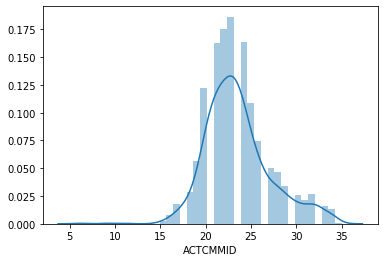

In [5]:
# ACT Score
sns.distplot(used_data['ACTCMMID'])

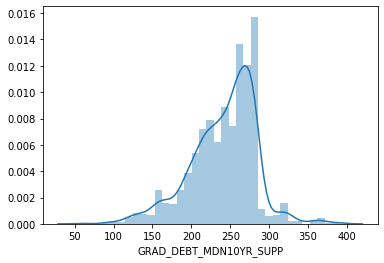

In [6]:
sns.distplot(used_data['GRAD_DEBT_MDN10YR_SUPP'])

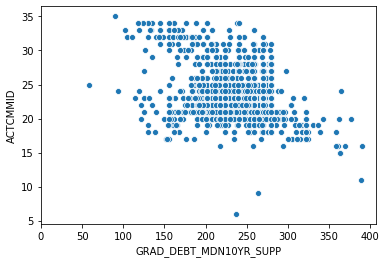

In [7]:
sns.scatterplot(x="GRAD_DEBT_MDN10YR_SUPP", y="ACTCMMID", data=used_data)
plt.xticks(np.arange(0, used_data['GRAD_DEBT_MDN10YR_SUPP'].max()+50, 50.0))
plt.show()

In [83]:
field_data = pd.read_csv('CollegeScorecard_Raw_Data/FieldOfStudyData1516_1617_PP.csv', low_memory = False)
field_data.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,NaN
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,31066,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,6.0
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,5.0,8.0
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,15,PrivacySuppressed,PrivacySuppressed,61527,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,9.0,10.0


/Users/seanbarber/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


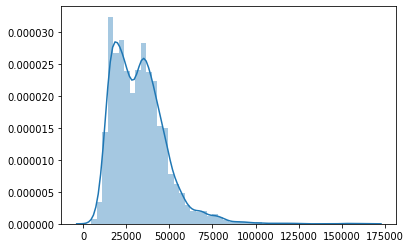

Max salary:  MD_EARN_WNE    164400
dtype: int64
Min salary:  MD_EARN_WNE    4600
dtype: int64
Median salary:  MD_EARN_WNE    31116.0
dtype: float64


In [86]:
field_data = field_data[['INSTNM', 'MD_EARN_WNE']]
result = field_data[field_data.MD_EARN_WNE != 'PrivacySuppressed']
result['MD_EARN_WNE'] = result['MD_EARN_WNE'].astype(int)
final = result.groupby('INSTNM').mean().astype(int).sort_values('MD_EARN_WNE')
sns.distplot(final)
plt.show()
print("Max salary: ", final.max())
print("Min salary: ", final.min())
print("Median salary: ", final.median())

In [10]:
combined_data = pd.merge(college_data, final, on='INSTNM')
combined_data[['INSTNM','GRAD_DEBT_MDN10YR_SUPP', 'ACTCMMID', 'MD_EARN_WNE']].head()

,INSTNM,GRAD_DEBT_MDN10YR_SUPP,ACTCMMID,MD_EARN_WNE
0,Alabama A & M University,358.0,18.0,38141
1,University of Alabama at Birmingham,234.0,25.0,56064
2,University of Alabama in Huntsville,229.0,28.0,56275
3,Alabama State University,339.0,18.0,33863
4,The University of Alabama,241.0,28.0,44896


## Machine Learning Analysis

      ACTCMMID  TUITIONFEE_IN  D_PCTPELL_PCTFLOAN
0         18.0         9857.0              4851.0
1         25.0         8328.0             12369.0
2         28.0        10280.0              6507.0
3         18.0        11068.0              4727.0
4         28.0        10780.0             32480.0
...        ...            ...                 ...
1144      18.0         7848.0              2261.0
1145      24.0         6347.0             32166.0
1146      25.0        32500.0               880.0
1147      23.0        17561.0              2833.0
1148      22.0         7582.0             14385.0

[1149 rows x 3 columns]


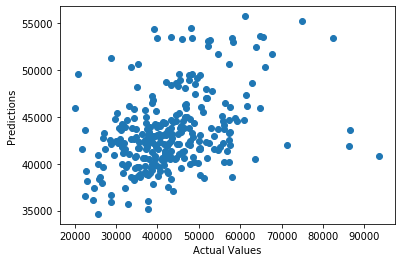

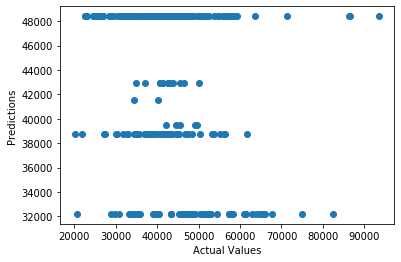

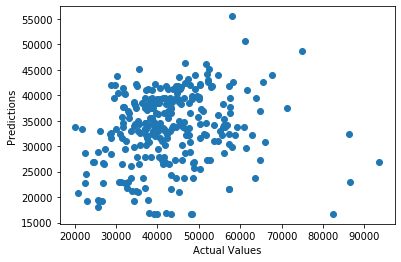

In [100]:
import numpy as np
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

features = ['ACTCMMID', 'TUITIONFEE_IN', 'D_PCTPELL_PCTFLOAN'] #'ACTCMMID', 'TUITIONFEE_IN', 'PCIP27', 'ADM_RATE', 'SAT_AVG'

X = combined_data[features]
print(X)
y = combined_data['MD_EARN_WNE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Linear Regression
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.show()

#SVM
svm = SVC()
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.show()

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.show()

Text(0, 0.5, 'Predictions')

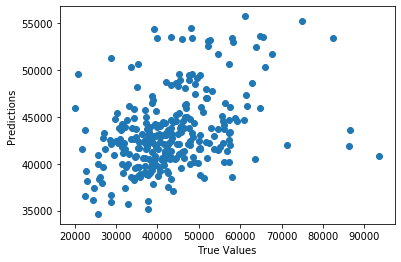

In [81]:
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

## Reflection

The most difficult part of our project that we have encountered so far was finding the correct data in order to 
do the analysis we wanted. There was information online of college student debt but not by college major like we wanted. 
Therefore we decide to find a larger more vague dataset and transform the data to get what we needed. Our initial insight was 
ceratin majors would enable students to pay off their debt faster after graduation. Difference job fields have higher starting
pay then others allowing for some graduates to have more initial disposable income. 

Are there any concrete results you can show at this point? If not, why not? Going forward, what are the current biggest problems you’re facing? 
We still need to see if we can finish our classification before we can answer these questions

By now we would have liked to have our data analysis completly finished so we can move on to visualizing our data in a simple and effective way. However we need to spend more time building an effective classification model in order to give us something to visualize. Given our initial exploration of the data we believe that we have what we need to get an answer to our question. We will proceed with our original plan for the project and no big change will be necessary.




## Next Steps

The biggest step will be going through the data to learn the trends with the economic data. Currently our model has a bad training rate, and an even worse test rate. If we want to be able to predict how much money a person would likely earn based off their ACT/SAT, size of school, etc. we need to look for the trends in the data. We currently do not have an actual prediction available for people to use, that would also be a next step. We did not realize that the economic data we were looking for we already had, this is one big problem with the vast amount of data we have.